In [6]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)
from reformat_column import format_number
import seaborn as sns

# Load the Excel file
file_path = 'Most Streamed Spotify Songs 2024 - Research.xlsx'
xls = pd.ExcelFile(file_path)

# Display sheet names to identify relevant data
print(xls.sheet_names)


['Views', 'Likes', 'Most Streamed Spotify Songs 202']


##### Data Cleaning and Setup

In [7]:
# Load the 'Likes' sheet
likes_df = pd.read_excel(xls, sheet_name='Likes', skiprows=2)

# Rename 'Row Labels' column
likes_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

# Load the 'Views' sheet
views_df = pd.read_excel(xls, sheet_name='Views', skiprows=2)
views_df.rename(columns={'Row Labels': 'Song Title'}, inplace=True)

most_streamed_df = pd.read_excel(xls, sheet_name='Most Streamed Spotify Songs 202')

# Specifying  columns that we're using for the purposes of our study
most_streamed_df = most_streamed_df[["Track",	
"Album Name",
"Artist",
"Release Date",
"All Time Rank",	
"Spotify Streams",	
"Spotify Playlist Count",
"Spotify Playlist Reach",	
"Spotify Popularity",
"YouTube Views",
"YouTube Likes",
"TikTok Posts",
"TikTok Likes",	
"TikTok Views",	
"YouTube Playlist Reach",
"Explicit Track"]]
most_streamed_df.head()

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09,1.505970e+08,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08,1.563804e+08,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09,3.737850e+08,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10,3.351189e+09,0
4,Houdini,Houdini,Eminem,2024-05-31,5,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN,1.127639e+08,1


In [8]:
# Ensure that the key columns have consistent names across DataFrames to facilitate merging
likes_df.rename(columns={'Song Title': 'Song'}, inplace=True)
views_df.rename(columns={'Song Title': 'Song'}, inplace=True)
most_streamed_df.rename(columns={'Track': 'Song'}, inplace=True)

# Select relevant columns
likes_df = likes_df[['Song', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]
complete_views_df = views_df[['Song', 'Max of Spotify Popularity', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']]
youtube_views_df = views_df[['Song', 'Sum of YouTube Views', 'Sum of TikTok Views']]

likes_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0
1,Love You So,1.842270e+10,122780.0
2,Oh No,4.959549e+09,466425.0
3,Spongebob,3.607885e+09,NaN
4,Funny Song,3.510270e+09,230150.0


In [9]:
# Combine the two DataFrames based on the 'Song' column
merged_df = pd.merge(likes_df, views_df, on='Song', how='inner')

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
3,Spongebob,3.607885e+09,NaN,NaN,3356,902103.0,NaN,3.335940e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10


In [10]:
# Remove rows with missing values
merged_df.dropna(inplace=True)

# Define the columns you want to format
columns_to_format = ['Sum of TikTok Likes', 'Sum of YouTube Likes', 'Sum of Spotify Streams', 'Sum of YouTube Views', 'Sum of TikTok Views']

merged_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10
5,Aesthetic,3.206991e+09,175081.0,44.0,114,33025746.0,6658234.0,3.985063e+10


In [11]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = merged_df.sort_values(by='Sum of TikTok Views', ascending=False).head(500)
most_streamed_df = most_streamed_df.sort_values(by='TikTok Views', ascending=False).head(500)

# Remove the 'Grand Total' row
top_500_tiktok_df = top_500_tiktok_df[top_500_tiktok_df['Song'] != 'Grand Total']
top_25_tiktok_df = top_500_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(25)
top_10_tiktok_df = top_25_tiktok_df.sort_values(by='Sum of TikTok Views', ascending=False).head(10)

# Display top 500 TikTok-viewed songs with their Spotify Streams
# top_500_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]

# Display top 25 TikTok-viewed songs with their Spotify Streams
# top_25_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]

# Display top 10 TikTok-viewed songs with their Spotify Streams
# top_10_tiktok_df[['Song', 'Sum of TikTok Views', 'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']]


# Apply styling for better readability (for display purposes)
formatted_top_500_df = top_500_tiktok_df.style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

formatted_top_25_df = top_25_tiktok_df.style.format({
    'Sum of TikTok Likes': '{:,.2f}',
    'Sum of YouTube Likes': '{:,.2f}',
    'Sum of Spotify Streams': '{:,.2f}',
    'Sum of YouTube Views': '{:,.2f}',
    'Sum of TikTok Views': '{:,.2f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

formatted_top_10_df = top_10_tiktok_df[['Song', 'Sum of TikTok Views',
                                           'Sum of YouTube Views', 'Sum of TikTok Likes', 'Sum of YouTube Likes']].style.format({
    'Sum of TikTok Likes': '{:,.0f}',
    'Sum of YouTube Likes': '{:,.0f}',
    'Sum of Spotify Streams': '{:,.0f}',
    'Sum of YouTube Views': '{:,.0f}',
    'Sum of TikTok Views': '{:,.0f}',
    'Max of Spotify Popularity': '{:,}'  # Add commas, no decimals
})

top_500_tiktok_df.head()

,Song,Sum of TikTok Likes,Sum of YouTube Likes,Max of Spotify Popularity,Min of All Time Rank,Sum of Spotify Streams,Sum of YouTube Views,Sum of TikTok Views
0,Monkeys Spinning Monkeys,2.347422e+10,123604.0,36.0,1018,11477477.0,11457166.0,2.332323e+11
1,Love You So,1.842270e+10,122780.0,44.0,1918,16326628.0,7603329.0,2.148440e+11
2,Oh No,4.959549e+09,466425.0,41.0,473,40284121.0,17978707.0,6.108856e+10
4,Funny Song,3.510270e+09,230150.0,39.0,1539,5866282.0,11793478.0,3.994631e+10
5,Aesthetic,3.206991e+09,175081.0,44.0,114,33025746.0,6658234.0,3.985063e+10


In [12]:
# df = top_500_tiktok_df[['Sum of TikTok Likes', 'Sum of YouTube Views']]
df = top_500_tiktok_df[['Sum of TikTok Likes', 'Sum of YouTube Views', 'Sum of Spotify Streams']]

# Compute the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                        Sum of TikTok Likes  Sum of YouTube Views  \
Sum of TikTok Likes                1.000000             -0.040986   
Sum of YouTube Views              -0.040986              1.000000   
Sum of Spotify Streams            -0.018827              0.455464   

                        Sum of Spotify Streams  
Sum of TikTok Likes                  -0.018827  
Sum of YouTube Views                  0.455464  
Sum of Spotify Streams                1.000000  


#####  Heatmap of Correlation Matrix

**Objective**: Visualize the correlation between different engagement metrics to identify strong and weak relationships.

**Interpretation**: The heatmap will display the strength and direction of relationships between engagement metrics, with colors indicating positive or negative correlations.

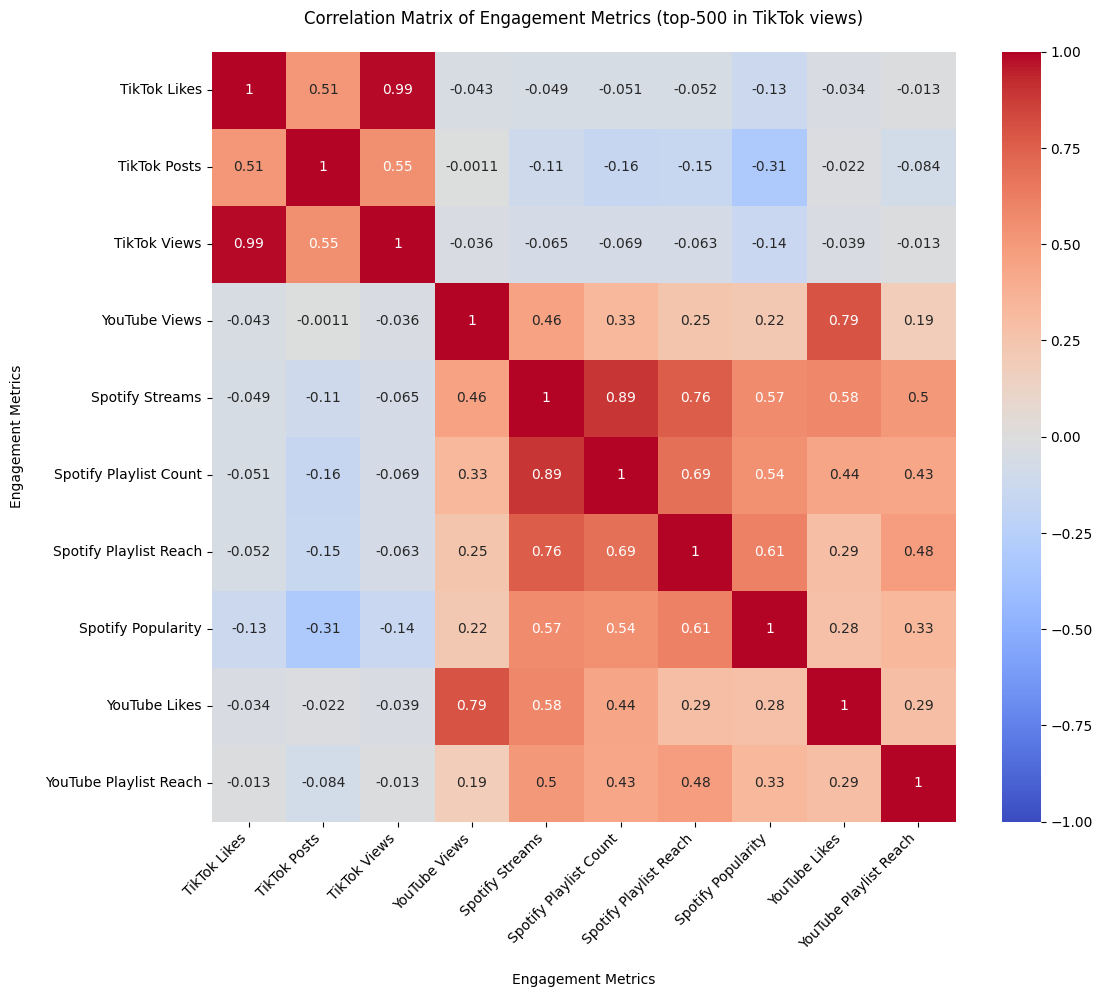

In [ ]:
# Select relevant columns
corr_df = most_streamed_df[['TikTok Likes', 'TikTok Posts', 'TikTok Views', 
                            'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 
                            'YouTube Likes', 'YouTube Views', 'YouTube Playlist Reach']]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.xlabel("Engagement Metrics", labelpad=15)  # Add padding to x-axis label
plt.ylabel("Engagement Metrics", labelpad=15)  # Add padding to y-axis label

# Adjust tick label positions using rotation
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

plt.title('Correlation Matrix of Engagement Metrics (top-500 in TikTok views)', pad=20)
plt.savefig("images/correlation_matrix_top500.png")
plt.show()


**Analysis of heatmaps**

**Correlation Between Platforms**:
 - Strong correlations exist between *YouTube Views*, *Spotify Streams*, and *Playlist Reach*, suggesting songs that perform well on one platform tend to perform well on others.
 - TikTok Likes have *weak* or *negative correlations* with streaming and playlist metrics, **suggesting TikTok popularity doesn’t always translate into high Spotify or YouTube engagement**.

 **Platform-Specific Trends**
  - In smaller datasets (Top-10, Top-25), *YouTube* and *Spotify* metrics show very high correlations, but as the dataset expands (Top-500), these correlations weaken, implying that mainstream hits are more universally popular across platforms, while lesser-known songs have more variable engagement.
  - TikTok Posts and Views are highly correlated, but their relationship with streaming metrics weakens as the dataset size increases.

**TikTok Influence**
  - While TikTok Views and Posts show a strong internal correlation, their impact on Spotify Streams is inconsistent across dataset sizes. In smaller datasets, TikTok engagement might appear more influential on streaming performance, but in larger datasets, the effect diminishes.

**Playlist Influence on Streams**
  - Spotify Playlist Count and Playlist Reach are consistently correlated with Spotify Streams, suggesting that placement in multiple playlists strongly impacts streaming numbers.

**Key Insights**
  - Virality vs. Longevity: TikTok success (Likes, Views, and Posts) does not strongly correlate with long-term streaming success, meaning viral moments don’t always convert into sustained listens.
  - Playlisting Matters: Songs with strong playlist placements (Reach & Count) tend to perform well on streaming platforms, highlighting the importance of playlist curation for long-term success.
  - Platform Synergy in Big Hits: Top 10 and Top 25 songs show stronger cross-platform correlations, while lower-ranked songs (Top 500) exhibit more diverse success patterns.

**NOTE**
- Try looking at this across random samples within the dataset